# Basic Explanatory Data Analysis Notebook of New York Taxi Data

The first step in any data science project is to getting know the data we work with.

In this notebook you can see a basic explanatory data analysis on New York Taxi data.

We will perform a basic statistical analysis that will help us to understand the behaviors of each feature and also examine and find outliers.

<img src="./images/taxi.jpeg" alt="Taxi" width="800"/>

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

In [131]:
df = pd.read_csv("https://s3.us-east-1.wasabisys.com/iguazio/data/nyc-taxi/train.csv")
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [132]:
df.shape

(220000, 8)

In [3]:
df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [4]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,220000.000000,220000.000000,220000.000000,219999.000000,219999.000000,220000.000000
mean,11.343941,-72.510259,39.921567,-72.515986,39.923063,1.682505
std,9.850563,11.595308,9.766042,10.707894,6.713161,1.306299
min,-44.900000,-740.000000,-3116.285383,-1251.195890,-1189.615440,0.000000
25%,6.000000,-73.992051,40.734958,-73.991305,40.734087,1.000000
50%,8.500000,-73.981763,40.752742,-73.980073,40.753192,1.000000
75%,12.500000,-73.967064,40.767093,-73.963538,40.768035,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


Text(0.5, 1.0, 'Distribution of the fare amount')

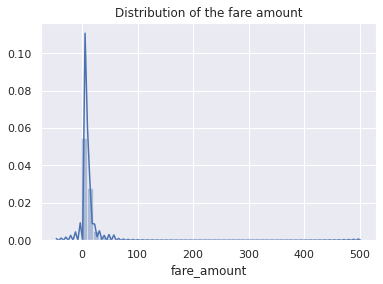

In [8]:
sns.distplot(df['fare_amount'])
plt.title('Distribution of the fare amount')

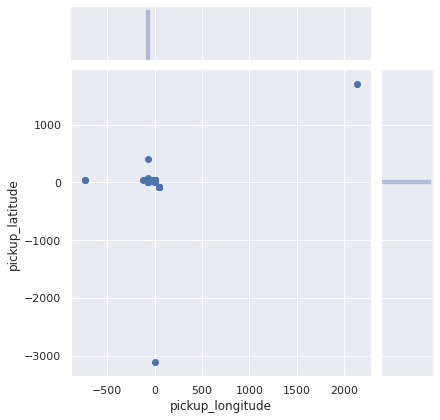

In [9]:
sns.jointplot(data=df, x="pickup_longitude", y="pickup_latitude")

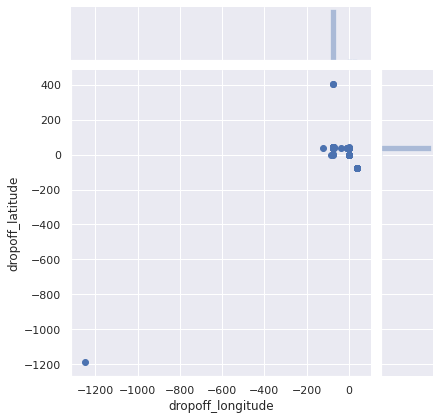

In [15]:
sns.jointplot(data=df, x="dropoff_longitude", y="dropoff_latitude")

In [129]:
import math
from geopy.distance import geodesic
import folium
import shapely
from shapely.geometry import Point
import numpy as np
import geog

lon, lat = df["pickup_longitude"].median(), df["pickup_latitude"].median()
ny_map = folium.Map(location=[lat, lon], zoom_start=0.5,prefer_canvas=True)

# add median point to map (represent new york city)
folium.Marker(
    location=list((lat, lon)),
    icon=folium.Icon(color="blue"),
).add_to(ny_map)

# add few suspishes outliers
folium.Marker(
    location=list((350, -50)),
    icon=folium.Icon(color="red"),
).add_to(ny_map)


folium.Marker(
    location=list((0, -300)),
    icon=folium.Icon(color="red"),
).add_to(ny_map)

folium.Marker(
    location=list((0, 0)),
    icon=folium.Icon(color="red"),
).add_to(ny_map)

ny_map.save(outfile= "ny_map.html")

import IPython
url = "./ny_map.html"
IPython.display.IFrame(url, width=700, height=450)

In [34]:
df["pickup_datetime"] = pd.to_datetime(
        df["pickup_datetime"], format="%Y-%m-%d %H:%M:%S UTC"
    )

df["hour"] = df.pickup_datetime.dt.hour
df["day"] = df.pickup_datetime.dt.day
df["month"] = df.pickup_datetime.dt.month
df["weekday"] = df.pickup_datetime.dt.weekday
df["year"] = df.pickup_datetime.dt.year

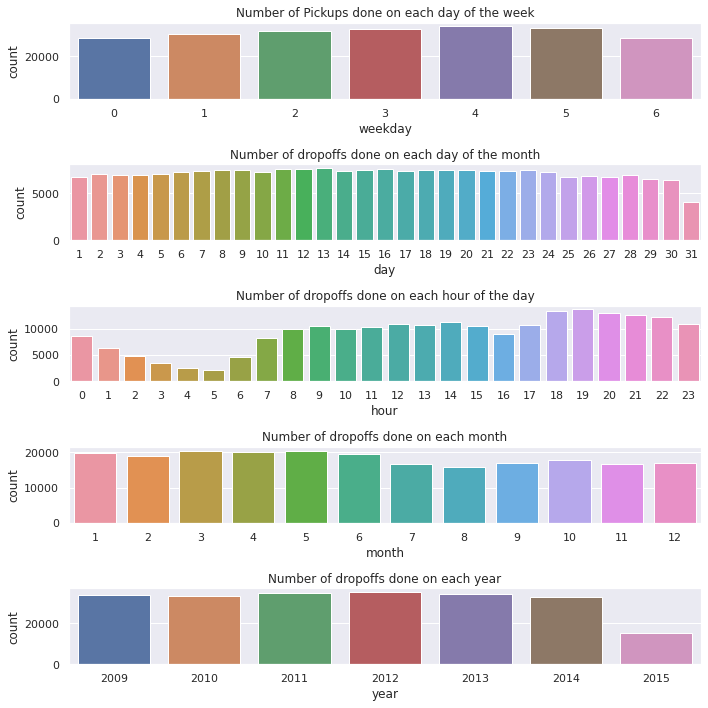

In [38]:
figure,ax=plt.subplots(nrows=5,ncols=1,figsize=(10,10))
sns.countplot(x='weekday',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='day',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the month')
sns.countplot(x='hour',data=df,ax=ax[2])
ax[2].set_title('Number of dropoffs done on each hour of the day')
sns.countplot(x='month',data=df,ax=ax[3])
ax[3].set_title('Number of dropoffs done on each month')
sns.countplot(x='year',data=df,ax=ax[4])
ax[4].set_title('Number of dropoffs done on each year')
plt.tight_layout()


In [50]:
df_corr = df.corr()['fare_amount'][1:] # -1 because the latest row is SalePrice
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with fare_amount:\n{}".format(len(golden_features_list), golden_features_list))

There is 0 strongly correlated values with fare_amount:
Series([], Name: fare_amount, dtype: float64)


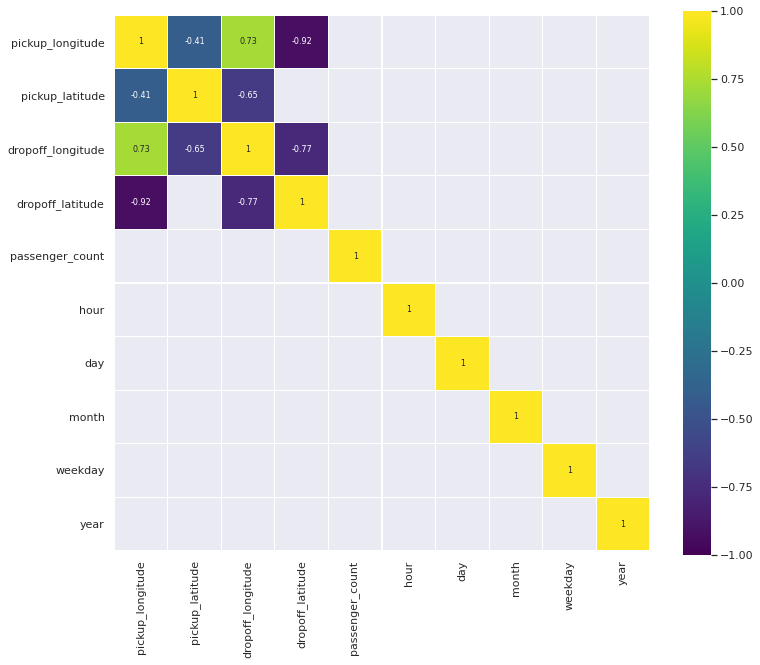

In [53]:
corr = df.drop('fare_amount', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);